In [1]:
#Import de módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from sklearn import metrics

In [2]:
#Carregando Arquivo de Treino
treino = pd.read_csv('train.csv', sep="," , encoding="UTF8" )

In [3]:
#Carregando Arquivo de Teste
teste = pd.read_csv('test.csv', sep="," , encoding="UTF8" )

In [4]:
#verificação de Linhas e Colunas
teste.shape

(4576, 47)

In [5]:
#verificação de Linhas e Colunas
treino.shape

(13730, 167)

In [6]:
#Vericação das 5 primeiras linhas de Teste
teste.head(5)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [7]:
#Vericação das 5 primeiras linhas de Treino
treino.head(5)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [8]:
#Verificação de dados nulos
treino.isnull().values.any()

True

In [9]:
#Verificação de dados nulos
teste.isnull().values.any()

True

In [10]:
#Notas Selecionadas
notas = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

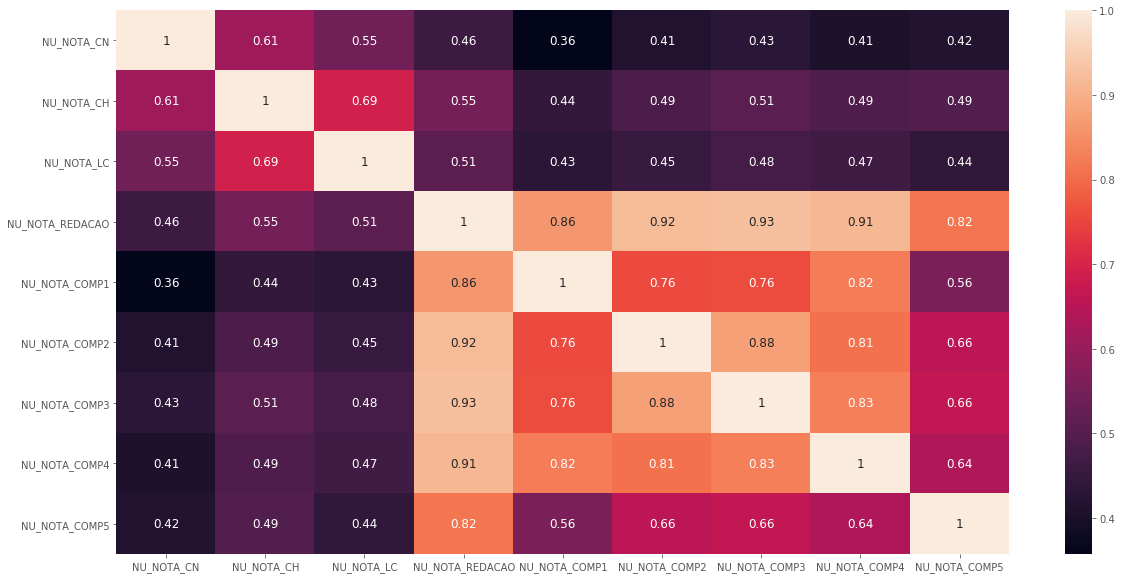

In [11]:
mapa = treino[notas].corr()
ax = plt.subplots(figsize=(20, 10))
sns.heatmap(mapa,  annot=True, annot_kws={"size": 12})

In [12]:
#Verificando valores nulos nas notas
treino[notas].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

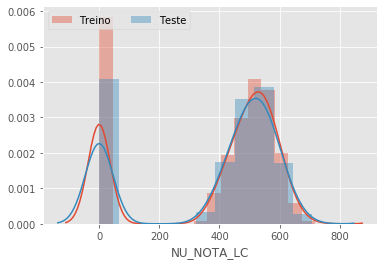

In [13]:
#Verificando distirbuição de valores
x0 = treino['NU_NOTA_LC'].fillna(0)
x1 = teste['NU_NOTA_LC'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left');

In [14]:
#Retirando valores nulos e zerados
treino = treino.loc[
    (treino['NU_NOTA_CN'].notnull())      & (treino['NU_NOTA_CN'] != 0) & 
    (treino['NU_NOTA_CH'].notnull())      & (treino['NU_NOTA_CH'] != 0) & 
    (treino['NU_NOTA_LC'].notnull())      & (treino['NU_NOTA_LC'] != 0) & 
    (treino['NU_NOTA_REDACAO'].notnull()) & (treino['NU_NOTA_REDACAO'] != 0)    
]

In [15]:
teste = teste.loc[
    (teste['NU_NOTA_CN'].notnull())      & (teste['NU_NOTA_CN'] != 0) & 
    (teste['NU_NOTA_CH'].notnull())      & (teste['NU_NOTA_CH'] != 0) & 
    (teste['NU_NOTA_LC'].notnull())      & (teste['NU_NOTA_LC'] != 0) & 
    (teste['NU_NOTA_REDACAO'].notnull()) & (teste['NU_NOTA_REDACAO'] != 0)    
]

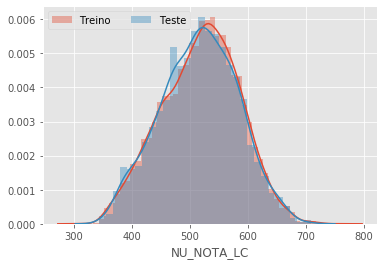

In [16]:
#Verificando distirbuição de valores
x0 = treino['NU_NOTA_LC'].fillna(0)
x1 = teste['NU_NOTA_LC'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left');

In [17]:
#Verificação de colunas existentes
teste.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [18]:
#Mantendo somente os registros que estavam "Presente" no segundo dia da prova.
teste = teste.loc[
    (teste['TP_PRESENCA_LC'] == 1)
]

In [19]:
teste[notas].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

In [20]:
#verificação de Linhas e Colunas
teste.shape

(3286, 47)

In [21]:
#Import de Regressão
from sklearn.ensemble import RandomForestRegressor

In [22]:
#Setando a variável TARGET
y_treino = treino['NU_NOTA_MT']

#Setar as colunas selecionadas
x_treino = treino[notas]
x_teste = teste[notas]

In [23]:
#Normalização dos dados com StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_treino = sc.fit_transform(x_treino)  
x_teste = sc.transform(x_teste)

In [24]:
regressor = RandomForestRegressor()

In [25]:
regressor.fit(x_treino, y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
y_pred_teste = regressor.predict(x_teste)

In [27]:
resposta = pd.DataFrame()
resposta['NU_NOTA_MT'] = np.around(y_pred_teste,2)

In [28]:
resposta

,NU_NOTA_MT
0,433.56
1,433.05
2,584.80
3,483.69
4,474.80
...,...
3281,528.66
3282,454.54
3283,493.57
3284,697.09


In [29]:
resposta.to_csv('answer2.csv', index=False, header=True)

In [30]:
identifica = pd.DataFrame()

In [31]:
identifica['NU_INSCRICAO'] = teste.NU_INSCRICAO

In [32]:
identifica

,NU_INSCRICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,b38a03232f43b11c9d0788abaf060f7366053b6d
4,715494628a50142ce8cb17191cfe6d0f3cae0934
5,e656d6bad65c93fb2880f1eba5037008c8e75774
...,...
4570,13aaf6335f43cfc1b8baeac559324f20b2653724
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef
4573,655fa6306720ff16e825903b5422a46608a77545


In [33]:
identifica.to_csv('answer.csv', index=False, header=True)